In [55]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [2]:
#Основная функция
def f(x):
    return math.exp(x)

In [44]:
a = -1.4
b = 0.3
h = 0.17
n = 10
#h = (b-a)/n

In [49]:
# Функция для генерации диапазона значений
def frange(start, stop, step):
    x = start
    while x <= stop + 1e-9:  # чтобы включить верхнюю границу
        yield x
        x += step

In [50]:
# Задаём узлы на отрезке [-1.4, 0.3]
x_vals = [round(i, 3) for i in frange(-1.4, 0.3, h)]
y_vals = [f(x) for x in x_vals]

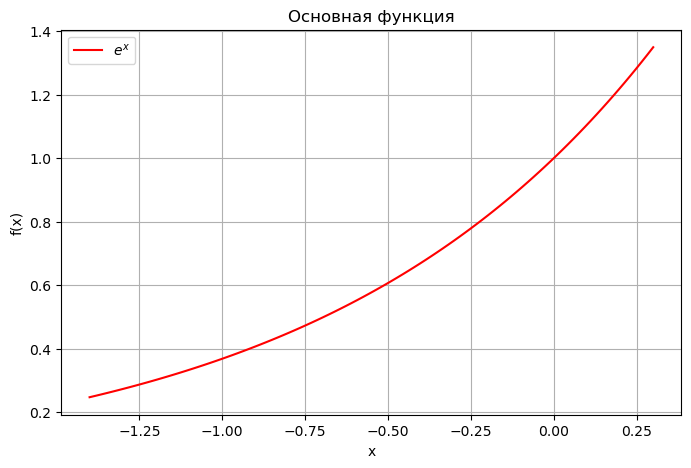

In [60]:
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Основная функция')
plt.legend()
plt.grid()
plt.show()

In [45]:
#Вычисление аналитически
I, err = quad(f, a, b)
print(I)

1.1032618436343966


1.0121403302798189


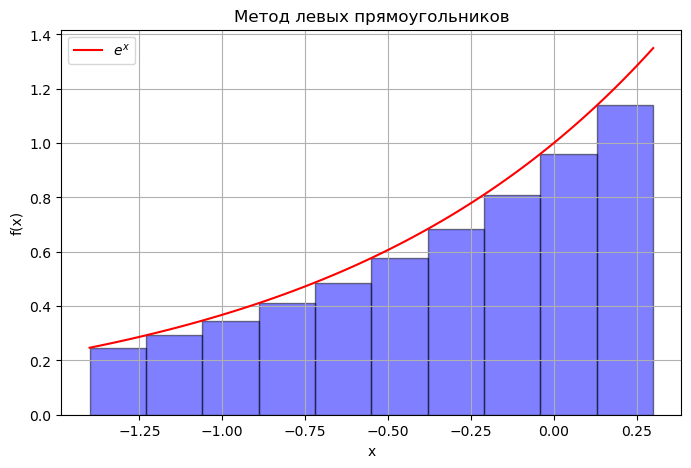

In [96]:
#Вычисление левыми прямоугольниками
s = 0
x_values = []
y_values = []

for i in range(0, n):
    x_i = a + i * h
    y_i = f(x_i)
    s += y_i * h
    x_values.append(x_i)
    y_values.append(y_i)
print(s)

# График
x_plot = np.linspace(a, b, 100)
y_plot = [f(x) for x in x_plot]

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Добавление прямоугольников
for i in range(n):
    x_i = x_values[i]
    y_i = y_values[i]
    plt.bar(x_i, y_i, width=h, align='edge', color='blue', alpha=0.5, edgecolor='black')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод левых прямоугольников')
plt.legend()
plt.grid()
plt.show()

In [78]:
# Вычисление погрешностей для левых прямоугольников

# Первая производная функции f(x) = e^x
def f_prime(x):
    return math.exp(x)  # Первая производная e^x

# Максимум первой производной на [a, b]
max_f_prime = max(f_prime(a), f_prime(b))

# Вычисление погрешности
Err_left_right = (max_f_prime * (b - a)**2) / (2 * n)
Err_left_right

0.19505459769473243

1.1996948436976662


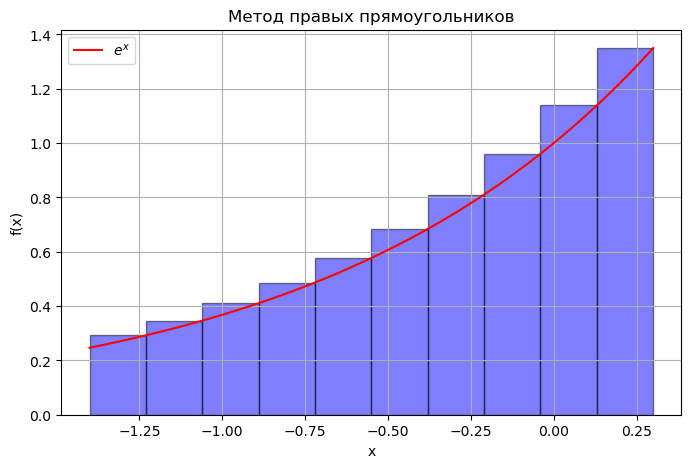

In [94]:
#Вычисление правыми прямоугольниками
s = 0
x_values = []
y_values = []

for i in range(1, n+1):
    x_i = a+(i*h)
    y_i = f(x_i)
    s += y_i * h
    x_values.append(x_i)
    y_values.append(y_i)
print(s)

# График
x_plot = np.linspace(a, b, 100)
y_plot = [f(x) for x in x_plot]

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Добавление прямоугольников
for i in range(n):
    x_i = x_values[i]
    y_i = y_values[i]
    plt.bar(x_i, y_i, width=-h, align='edge', color='blue', alpha=0.5, edgecolor='black')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод правых прямоугольников')
plt.legend()
plt.grid()
plt.show()

In [79]:
# Вычисление погрешностей для правых прямоугольников

# Первая производная функции f(x) = e^x
def f_prime(x):
    return math.exp(x)  # Первая производная e^x

# Максимум первой производной на [a, b]
max_f_prime = max(f_prime(a), f_prime(b))

# Вычисление погрешности
Err_left_right = (max_f_prime * (b - a)**2) / (2 * n)
Err_left_right

0.19505459769473243

1.1019344514693927


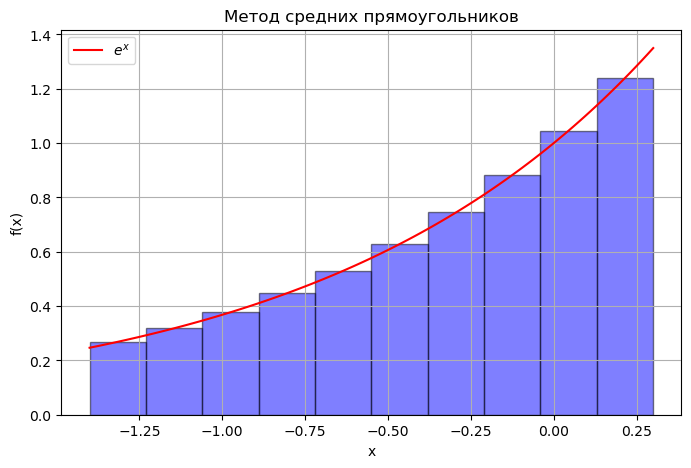

In [95]:
#Вычисление средними прямоугольниками
s = 0
x_values = []
y_values = []

for i in range(0, n):
    x_i = a+((i+0.5)*h)
    y_i = f(x_i)
    s += y_i * h
    x_values.append(x_i)
    y_values.append(y_i)
print(s)

# График
x_plot = np.linspace(a, b, 100)
y_plot = [f(x) for x in x_plot]

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Добавление прямоугольников
for i in range(n):
    x_i = x_values[i]
    y_i = y_values[i]
    plt.bar(x_i-h/2, y_i, width=h, align='edge', color='blue', alpha=0.5, edgecolor='black')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод средних прямоугольников')
plt.legend()
plt.grid()
plt.show()

In [81]:
# Вычисление погрешностей для средних прямоугольников

# Вторая производная функции f(x) = e^x
def f_double_prime(x):
    return math.exp(x)  # Вторая производная e^x

# Максимум второй производной на [a, b]
max_f_double_prime = max(f_double_prime(a), f_double_prime(b))

# Вычисление погрешности
Err_mid = (max_f_double_prime * (b - a)**3) / (24 * n**2)
Err_mid

0.0027632734673420432

1.1059175869887423


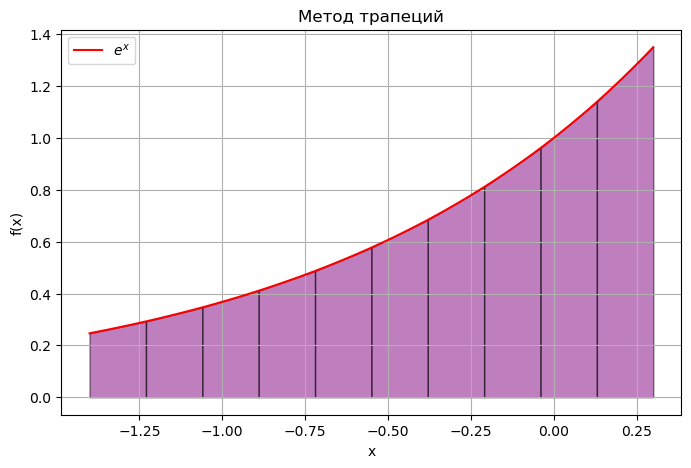

In [91]:
#Вычисление методом трапеций
s_trap = 0
x_trap_values = np.linspace(a, b, n + 1)  # Узлы для метода трапеций
y_trap_values = [f(x) for x in x_trap_values]

for i in range(n):
    s_trap += (y_trap_values[i] + y_trap_values[i + 1]) * h / 2  # Формула трапеций
print(s_trap)

# График
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Добавление трапеций
for i in range(n):
    x1, x2 = x_trap_values[i], x_trap_values[i + 1]
    y1, y2 = y_trap_values[i], y_trap_values[i + 1]
    plt.fill_between([x1, x2], [y1, y2], color='purple', alpha=0.5, edgecolor='black')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод трапеций')
plt.legend()
plt.grid()
plt.show()

In [97]:
# Вычисление погрешностей для метода трапеций

# Вторая производная функции f(x) = e^x
def f_double_prime(x):
    return math.exp(x)  # Вторая производная e^x

# Максимум второй производной на [a, b]
max_f_double_prime = max(f_double_prime(a), f_double_prime(b))

# Вычисление погрешности
Err_trap = (max_f_double_prime * (b - a)**3) / (12 * n**2)
Err_trap

0.0055265469346840864

1.1032621633091757


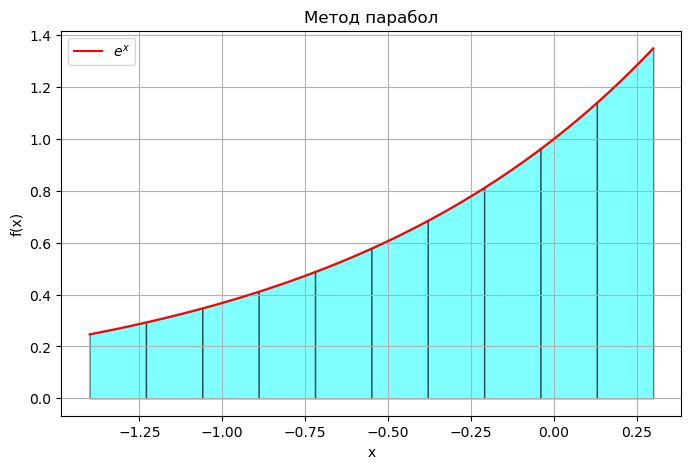

In [90]:
# Вычисление методом парабол (метод Симпсона)
s_parabola = 0
for i in range(n):
    x_i = a + i * h_simpson
    x_mid = x_i + 0.5 * h_simpson
    x_next = x_i + h_simpson
    s_parabola += (f(x_i) + 4 * f(x_mid) + f(x_next)) * h_simpson / 6
print(s_parabola)

# График
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Добавление параболических участков
for i in range(n):
    x_i = a + i * h_simpson
    x_mid = x_i + 0.5 * h_simpson
    x_next = x_i + h_simpson

    # Построение параболы через три точки
    poly_coeffs = np.polyfit([x_i, x_mid, x_next], [f(x_i), f(x_mid), f(x_next)], 2)
    x_parabola = np.linspace(x_i, x_next, 20)
    y_parabola = np.polyval(poly_coeffs, x_parabola)

    plt.fill_between(x_parabola, y_parabola, color='cyan', alpha=0.5, edgecolor='black')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод парабол')
plt.legend()
plt.grid()
plt.show()

In [98]:
# Вычисление погрешности для метода Симпсона (метод парабол)

# Четвертая производная функции f(x) = e^x
def f_fourth_prime(x):
    return math.exp(x)  # Четвертая производная e^x остается e^x

# Максимальное значение четвертой производной на [a, b]
max_f_fourth_prime = max(f_fourth_prime(a), f_fourth_prime(b))

# Вычисление погрешности по формуле
Err_simpson = (max_f_fourth_prime * (b - a)**5) / (2880 * n**4)

# Вывод значения погрешности
Err_simpson

6.65488360051542e-07

0.9808146776468275


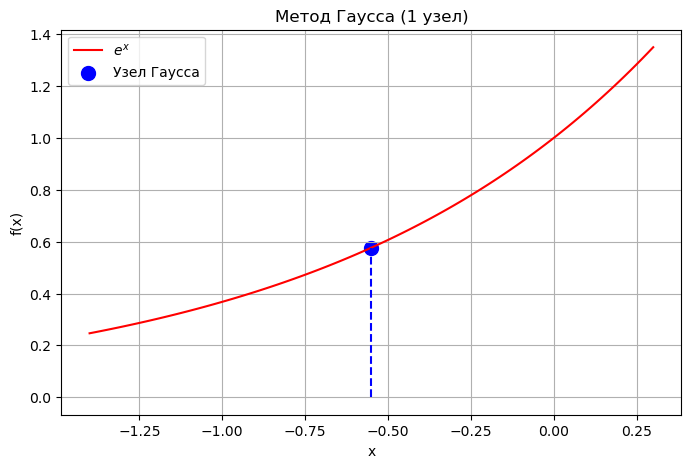

In [100]:
# Метод Гаусса для 1 узла

# Узел и вес для n=1
x_gauss_1 = 0 #корни полиномов Лежандра
w_gauss_1 = 2 #выбираются так, чтобы метод был точным для многочленов до 2n−1 степени
#оба эти параметра табличные значения

# Перенос узла на отрезок [a, b], так как изначально Гаусс раюотает на [-1,1]
x_mapped = (b - a) / 2 * x_gauss_1 + (a + b) / 2

# Вычисление интеграла
I_gauss_1 = (b - a) * f(x_mapped)
print(I_gauss_1)

# График
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Отображение узла
plt.scatter(x_mapped, f(x_mapped), color='blue', s=100, label='Узел Гаусса')

# Вертикальная линия к узлу
plt.vlines(x_mapped, 0, f(x_mapped), colors='blue', linestyles='dashed')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод Гаусса (1 узел)')
plt.legend()
plt.grid()
plt.show()

In [102]:
# Вычисление погрешности метода Гаусса с 1 узлом
# В методе Гаусса с 1 узлом погрешность оценивается как max(f''(ξ)) * (b-a)^3/12

# Вторая производная функции f(x) = e^x
def f_double_prime(x):
    return math.exp(x)

# Максимальное значение второй производной на [a, b]
max_f_double_prime_gauss = max(f_double_prime(a), f_double_prime(b))

# Формула погрешности для 1 узла
Err_gauss_1 = ((b - a)**3 / 12) * max_f_double_prime_gauss
Err_gauss_1


0.5526546934684086

1.101310552804357


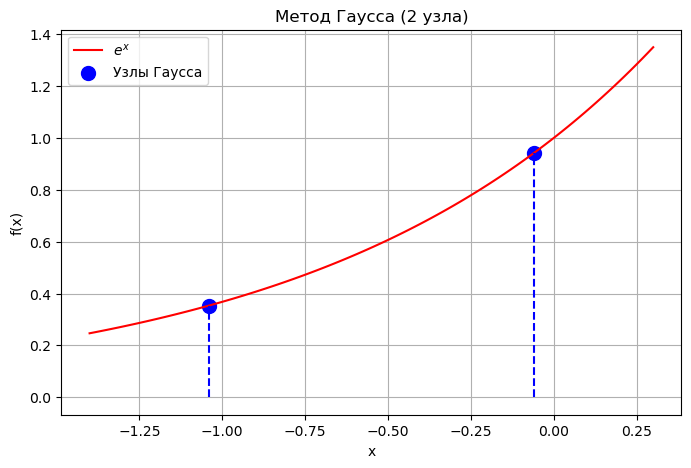

In [103]:
# Метод Гаусса для 2 узлов

# Узлы и веса для n=2 (из таблицы)
x_gauss_2 = [-1/np.sqrt(3), 1/np.sqrt(3)]
w_gauss_2 = [1, 1]

# Перенос узлов на отрезок [a, b]
x_mapped_2 = [(b - a) / 2 * x + (a + b) / 2 for x in x_gauss_2]

# Вычисление интеграла
I_gauss_2 = (b - a) / 2 * sum(w * f(x) for w, x in zip(w_gauss_2, x_mapped_2))
print(I_gauss_2)

# График
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Отображение узлов
plt.scatter(x_mapped_2, [f(x) for x in x_mapped_2], color='blue', s=100, label='Узлы Гаусса')

# Вертикальные линии к узлам
for x in x_mapped_2:
    plt.vlines(x, 0, f(x), colors='blue', linestyles='dashed')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод Гаусса (2 узла)')
plt.legend()
plt.grid()
plt.show()

In [105]:
# Вычисление погрешности метода Гаусса с 2 узлами
# В методе Гаусса с 2 узлами погрешность оценивается как max(f''''(ξ)) * (b-a)^5/(90*16)

# Четвертая производная функции f(x) = e^x
def f_fourth_prime(x):
    return math.exp(x)

# Максимальное значение четвертой производной на [a, b]
max_f_fourth_prime_gauss = max(f_fourth_prime(a), f_fourth_prime(b))

# Формула погрешности для 2 узлов (из теории Гауссовых квадратур)
Err_gauss_2 = ((b - a)**5 / (90 * 16)) * max_f_fourth_prime_gauss
Err_gauss_2

0.01330976720103084

1.1032498385366043


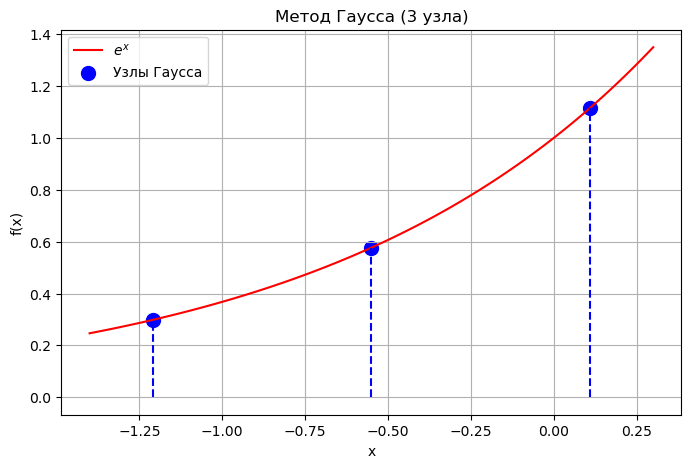

In [106]:
# Метод Гаусса для 3 узлов

# Узлы и веса для n=3 (из таблицы)
x_gauss_3 = [-np.sqrt(3/5), 0, np.sqrt(3/5)]
w_gauss_3 = [5/9, 8/9, 5/9]

# Перенос узлов на отрезок [a, b]
x_mapped_3 = [(b - a) / 2 * x + (a + b) / 2 for x in x_gauss_3]

# Вычисление интеграла
I_gauss_3 = (b - a) / 2 * sum(w * f(x) for w, x in zip(w_gauss_3, x_mapped_3))
print(I_gauss_3)

# График
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, 'r-', label=r'$e^x$')  # График функции

# Отображение узлов
plt.scatter(x_mapped_3, [f(x) for x in x_mapped_3], color='blue', s=100, label='Узлы Гаусса')

# Вертикальные линии к узлам
for x in x_mapped_3:
    plt.vlines(x, 0, f(x), colors='blue', linestyles='dashed')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Метод Гаусса (3 узла)')
plt.legend()
plt.grid()
plt.show()

In [107]:
# Вычисление погрешности метода Гаусса с 3 узлами

# В методе Гаусса с 3 узлами погрешность оценивается как max(f''''''(ξ)) * (b-a)^7/(8*945)

# Шестая производная функции f(x) = e^x
def f_sixth_prime(x):
    return math.exp(x)

# Максимальное значение шестой производной на [a, b]
max_f_sixth_prime_gauss = max(f_sixth_prime(a), f_sixth_prime(b))

# Формула погрешности для 3 узлов (из теории Гауссовых квадратур)
Err_gauss_3 = ((b - a)**7 / (8 * 945)) * max_f_sixth_prime_gauss
Err_gauss_3

0.007326709944948404